[ 0.08087359  0.28414423  0.3485172   0.4730977   1.53376608  1.6946192
  1.75034885  1.84591745  2.11557968  2.17953273  2.19525402  2.27217824
  2.4110535   2.58357645  2.86075747  3.112627    3.12211671  3.16690015
  3.19663426  3.33047938  3.48004859  3.567092    3.70238655  3.85465104
  3.91447337]
[ 0.46566244 -1.53624369  1.48825219  1.89588918  1.17877957 -0.17992484
 -1.07075262  1.05445173 -0.40317695  1.22244507  0.20827498  0.97663904
  0.3563664   0.70657317  0.01050002  1.78587049  0.12691209  0.40198936
  1.8831507  -1.34775906 -1.270485    0.96939671 -1.17312341  1.94362119
 -0.41361898]


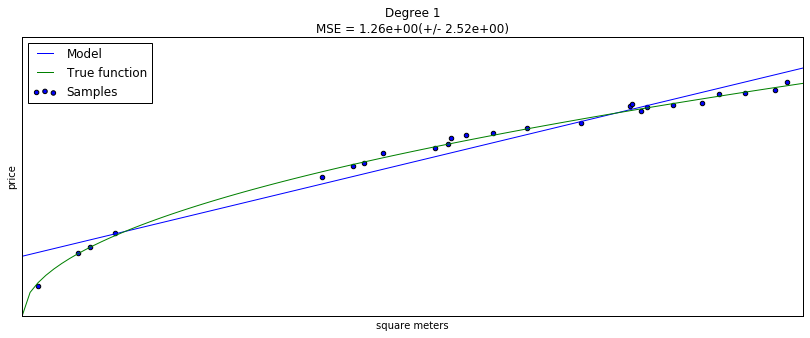

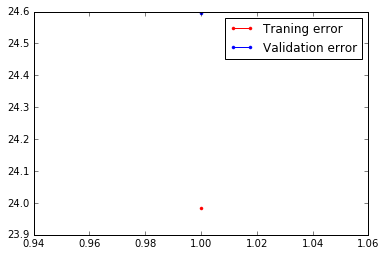

In [342]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 25
degrees = [1]


#true_fun = lambda X: np.cos(1.1 * np.pi * (X+0.8))
true_fun = lambda X: np.sqrt(X*100)
X = np.sort(np.random.rand(n_samples)) * 4
print X
y = true_fun(X) + np.random.randn(n_samples)  *0.3

X_validation = np.sort(np.random.rand(n_samples))  * 4
y_validation = true_fun(X_validation) + np.random.randn(n_samples) *0.3

print np.random.randn(n_samples)

subplot = 1
plt.figure(figsize=(14, 5))
train_error = []
validation_error = []
for i in range(1, degrees[len(degrees)-1]+1):
    polynomial_features = PolynomialFeatures(degree=i,  include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    prediction = pipeline.predict(X[:, np.newaxis])
    RSS = ((prediction - y) **2).sum()
    train_error.append(RSS)

    validation = pipeline.predict(X_validation[:, np.newaxis])
    #add 1 for better visualization
    RSS_validation = ((validation - y_validation) **2).sum() + 5
    validation_error.append(RSS_validation)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=n_samples)
    if i in degrees:
        ax = plt.subplot(1, len(degrees), subplot)
        subplot = subplot+1
        plt.setp(ax, xticks=(), yticks=())
    
        X_test = np.linspace(0, 4, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, label="Samples")
        plt.xlabel("square meters")
        plt.ylabel("price")
        plt.xlim((0, 4))
        plt.ylim((0, 24))
        plt.legend(loc="best")
        plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(i, -scores.mean(), scores.std()))
plt.show()

plt.plot(range(1, degrees[len(degrees)-1]+1), train_error, '.r-', label="Traning error")
plt.plot(range(1, degrees[len(degrees)-1]+1), validation_error, '.b-', label="Validation error")
plt.legend(loc="best")
plt.show()


[ -1.           0.58176402   1.58514851   4.09526832   4.4750344
   5.39501925   6.6079856    7.31292809   7.64633011   7.74803857
   8.46426164  10.        ]
[-1.03890595  0.80650003  1.08281608  5.47091024  2.67634266  5.78775254
  4.73453478  8.37140462  6.76129451  7.21184627  8.6656327   9.2990654 ]


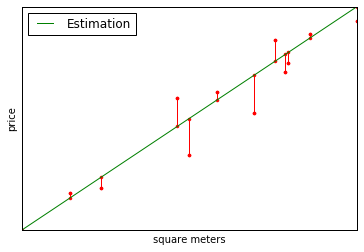

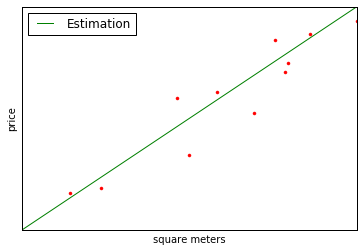

In [341]:
X_linear = np.append(-1,np.append(np.sort(np.random.rand(10)) * 10,10))
Y_linear = X_linear+ np.random.randn(len(X_linear))*1
print X_linear
print Y_linear
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
for i in range(len(X_linear)):
    plt.plot([X_linear[i],X_linear[i]], [X_linear[i],Y_linear[i]], '.-r')
    
plt.plot(X_linear, Y_linear, '.r')
plt.plot(X_linear, X_linear, 'g', label="Estimation")
plt.legend(loc="best")
plt.xlabel("square meters")
plt.ylabel("price")
plt.xlim((-1, 10))
plt.ylim((-1, 10))
plt.show()

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.plot(X_linear, Y_linear, '.r')
plt.plot(X_linear, X_linear, 'g', label="Estimation")
plt.legend(loc="best")
plt.xlabel("square meters")
plt.ylabel("price")
plt.xlim((-1, 10))
plt.ylim((-1, 10))
plt.show()

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


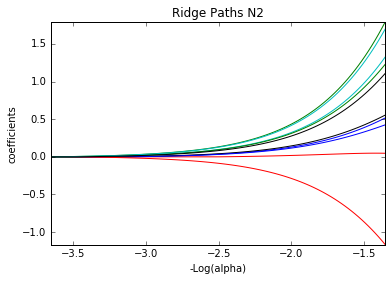

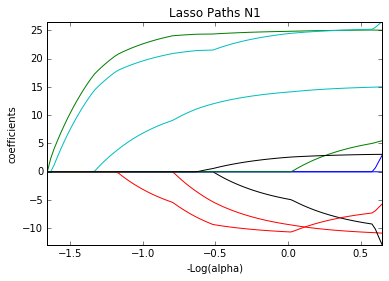

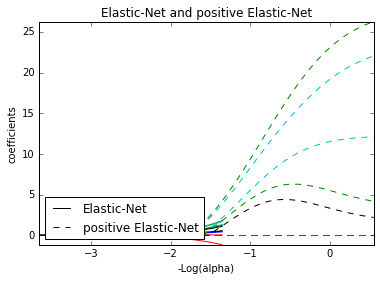

In [358]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.01, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Ridge Paths N2')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Paths N1')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()